# Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor

# Step 2 : Import Data

In [2]:
data = pd.read_csv(r"C:\Users\gajan\OneDrive\Documents\Projects\CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Checking Info of The Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Removing Categorical Variable

In [4]:
df = data.drop(['car_ID','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], axis = 1)
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


## Statistical Analysis

In [5]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Checking Missing Values

In [6]:
df.isna().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### There is no any missing value in the data.

## Identifying & Treatment of Outliers

<AxesSubplot:>

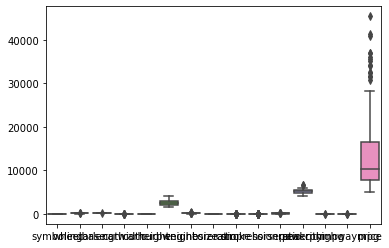

In [7]:
sns.boxplot(data = df)

## Removing Outliers By Winsorizing Technique

In [8]:
def outliers(df):
    a = df.select_dtypes(include = [np.number]).columns.tolist()
    for i in a:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        df[i] = np.where(df[i]>upper_limit,upper_limit,df[i])
        df[i] = np.where(df[i]<lower_limit,lower_limit,df[i])

In [9]:
outliers(df)

<AxesSubplot:>

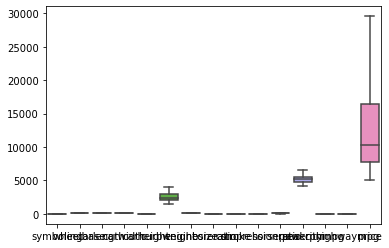

In [10]:
sns.boxplot(data = df)

# Step 3 : Data Partition

In [11]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [12]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = df.drop(['price'],axis=1)
train_y = df['price']

# Train test split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=100)

In [13]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,1.0,93.7,167.3,63.8,50.8,2191.0,98.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0
125,3.0,94.5,168.9,68.3,50.2,2778.0,151.0,3.94,3.11,9.5,143.0,5500.0,19.0,27.0
166,1.0,94.5,168.7,64.0,52.6,2300.0,98.0,3.24,3.08,9.4,112.0,6550.0,26.0,29.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
199,-1.0,104.3,188.8,67.2,57.5,3157.0,130.0,3.62,3.15,7.5,162.0,5100.0,17.0,22.0


# Step 4 : Scaling Data

In [14]:
from sklearn.preprocessing import StandardScaler ,minmax_scale
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
#scaler.fit(X_train)         # Mean = 0 & standard Deviation =1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train[0:5]

array([[ 0.17015896, -0.81585177, -0.48723798, -0.93816222, -1.13462843,
        -0.64212823, -0.72263337, -1.2973286 , -0.07790507,  0.46985798,
        -0.95614006,  0.77378012,  0.85185686,  1.08513222],
       [ 1.8482784 , -0.67999523, -0.35978851,  1.1529614 , -1.38202644,
         0.43941532,  0.80892097,  2.43225586, -0.50365382,  0.59961791,
         1.21460553,  0.77378012, -0.96402683, -0.56645267],
       [ 0.17015896, -0.67999523, -0.37571969, -0.84522339, -0.39243438,
        -0.44129646, -0.72263337, -0.25919684, -0.610091  ,  0.46985798,
         0.31736402,  2.96798378,  0.09523866, -0.26616451],
       [ 1.8482784 , -1.68193721, -0.3677541 , -0.79875398, -1.95928848,
         0.01564187,  0.20207868,  0.62513762, -2.02925348, -0.04918174,
         0.28842074, -0.27107878, -0.66137955, -0.56645267],
       [-1.50796047,  0.98424738,  1.22536424,  0.64179785,  1.62798274,
         1.13772026,  0.20207868,  1.20187748, -0.36173757, -1.99558067,
         1.76452775, -0.06

In [21]:
X_train.mean(axis=0)

array([ 3.72662274e-17,  4.09928501e-16,  1.73909061e-16, -1.05587644e-15,
        5.34149259e-16, -1.61486985e-16, -1.86331137e-16, -1.06208748e-15,
        9.82120368e-16,  1.53723188e-16, -1.42853872e-16, -4.09928501e-16,
        1.24220758e-16, -8.69545306e-17])

In [22]:
 X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Step 5 : Model Building

In [28]:
model = KNeighborsRegressor(n_neighbors=6)
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

# Step 6 : Predictions on Train Dataset

In [29]:
df.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


In [31]:
X_train=pd.DataFrame(X_train,columns=['symboling', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.170159,-0.815852,-0.487238,-0.938162,-1.134628,-0.642128,-0.722633,-1.297329,-0.077905,0.469858,-0.956140,0.773780,0.851857,1.085132
1,1.848278,-0.679995,-0.359789,1.152961,-1.382026,0.439415,0.808921,2.432256,-0.503654,0.599618,1.214606,0.773780,-0.964027,-0.566453
2,0.170159,-0.679995,-0.375720,-0.845223,-0.392434,-0.441296,-0.722633,-0.259197,-0.610091,0.469858,0.317364,2.967984,0.095239,-0.266165
3,1.848278,-1.681937,-0.367754,-0.798754,-1.959288,0.015642,0.202079,0.625138,-2.029253,-0.049182,0.288421,-0.271079,-0.661380,-0.566453
4,-1.507960,0.984247,1.225364,0.641798,1.627983,1.137720,0.202079,1.201877,-0.361738,-1.995581,1.764528,-0.062107,-1.266674,-1.317173


In [32]:
y_train.reset_index(drop=True, inplace=True)

In [33]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.170159,-0.815852,-0.487238,-0.938162,-1.134628,-0.642128,-0.722633,-1.297329,-0.077905,0.469858,-0.956140,0.773780,0.851857,1.085132,7609.0
1,1.848278,-0.679995,-0.359789,1.152961,-1.382026,0.439415,0.808921,2.432256,-0.503654,0.599618,1.214606,0.773780,-0.964027,-0.566453,22018.0
2,0.170159,-0.679995,-0.375720,-0.845223,-0.392434,-0.441296,-0.722633,-0.259197,-0.610091,0.469858,0.317364,2.967984,0.095239,-0.266165,9538.0
3,1.848278,-1.681937,-0.367754,-0.798754,-1.959288,0.015642,0.202079,0.625138,-2.029253,-0.049182,0.288421,-0.271079,-0.661380,-0.566453,16500.0
4,-1.507960,0.984247,1.225364,0.641798,1.627983,1.137720,0.202079,1.201877,-0.361738,-1.995581,1.764528,-0.062107,-1.266674,-1.317173,18950.0


In [34]:
train['Predicted']=model.predict(X_train)
train.head()

C:\Users\akash\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Predicted
0,0.170159,-0.815852,-0.487238,-0.938162,-1.134628,-0.642128,-0.722633,-1.297329,-0.077905,0.469858,-0.956140,0.773780,0.851857,1.085132,7609.0,6638.000000
1,1.848278,-0.679995,-0.359789,1.152961,-1.382026,0.439415,0.808921,2.432256,-0.503654,0.599618,1.214606,0.773780,-0.964027,-0.566453,22018.0,20386.000000
2,0.170159,-0.679995,-0.375720,-0.845223,-0.392434,-0.441296,-0.722633,-0.259197,-0.610091,0.469858,0.317364,2.967984,0.095239,-0.266165,9538.0,9849.666667
3,1.848278,-1.681937,-0.367754,-0.798754,-1.959288,0.015642,0.202079,0.625138,-2.029253,-0.049182,0.288421,-0.271079,-0.661380,-0.566453,16500.0,13167.666667
4,-1.507960,0.984247,1.225364,0.641798,1.627983,1.137720,0.202079,1.201877,-0.361738,-1.995581,1.764528,-0.062107,-1.266674,-1.317173,18950.0,16397.166667


In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(train.price, train.Predicted)
print('R2 score for model Performance on Train', np.round(r2,2))

R2 score for model Performance on Train 0.86


### The Accuracy Of Train Dataset Is 86%.

# Step 7 : Predictions on Test Dataset

In [36]:
X_test=pd.DataFrame(X_test,columns=['symboling', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])
X_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-0.668901,-0.476210,-0.566894,-0.659346,-0.227502,-0.820850,-0.722633,-0.451443,-0.787486,-0.049182,-0.898254,-0.689022,1.911122,2.436429
1,1.009219,-0.204497,-0.136752,-0.148182,0.885789,-0.487359,-0.404764,-0.451443,0.525239,-0.049182,-0.464104,0.251351,0.246562,0.484556
2,0.170159,0.050234,0.349149,0.316512,0.061129,-0.284685,-0.029099,0.317543,0.489760,-0.568221,-0.493048,-0.689022,0.095239,0.184268
3,0.170159,-0.679995,-0.375720,-0.845223,-0.392434,-0.505784,-0.722633,-0.259197,-0.610091,0.469858,0.317364,2.967984,0.095239,-0.266165
4,1.009219,-0.883780,-1.283797,-0.938162,0.885789,-0.551846,-0.433661,1.201877,-2.100212,-0.438462,-0.811424,-1.524909,0.095239,0.034124


In [37]:
y_test.reset_index(drop=True, inplace=True)

In [38]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-0.668901,-0.476210,-0.566894,-0.659346,-0.227502,-0.820850,-0.722633,-0.451443,-0.787486,-0.049182,-0.898254,-0.689022,1.911122,2.436429,7738.0
1,1.009219,-0.204497,-0.136752,-0.148182,0.885789,-0.487359,-0.404764,-0.451443,0.525239,-0.049182,-0.464104,0.251351,0.246562,0.484556,8495.0
2,0.170159,0.050234,0.349149,0.316512,0.061129,-0.284685,-0.029099,0.317543,0.489760,-0.568221,-0.493048,-0.689022,0.095239,0.184268,8845.0
3,0.170159,-0.679995,-0.375720,-0.845223,-0.392434,-0.505784,-0.722633,-0.259197,-0.610091,0.469858,0.317364,2.967984,0.095239,-0.266165,9298.0
4,1.009219,-0.883780,-1.283797,-0.938162,0.885789,-0.551846,-0.433661,1.201877,-2.100212,-0.438462,-0.811424,-1.524909,0.095239,0.034124,7603.0


In [39]:
test['Predicted']=model.predict(X_test)
test.head()

C:\Users\akash\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Predicted
0,-0.668901,-0.476210,-0.566894,-0.659346,-0.227502,-0.820850,-0.722633,-0.451443,-0.787486,-0.049182,-0.898254,-0.689022,1.911122,2.436429,7738.0,6877.916667
1,1.009219,-0.204497,-0.136752,-0.148182,0.885789,-0.487359,-0.404764,-0.451443,0.525239,-0.049182,-0.464104,0.251351,0.246562,0.484556,8495.0,8202.000000
2,0.170159,0.050234,0.349149,0.316512,0.061129,-0.284685,-0.029099,0.317543,0.489760,-0.568221,-0.493048,-0.689022,0.095239,0.184268,8845.0,9010.333333
3,0.170159,-0.679995,-0.375720,-0.845223,-0.392434,-0.505784,-0.722633,-0.259197,-0.610091,0.469858,0.317364,2.967984,0.095239,-0.266165,9298.0,9849.666667
4,1.009219,-0.883780,-1.283797,-0.938162,0.885789,-0.551846,-0.433661,1.201877,-2.100212,-0.438462,-0.811424,-1.524909,0.095239,0.034124,7603.0,7442.500000


In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(test.price, test.Predicted)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.77


### The Accuracy Of Test Dataset Is 77 % So We Can Say That Our Model Is Good Fit.

# Finish..!